In [7]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import torch
from iMatDataset import iMatDataset
import numpy as np
from collections import Counter
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = iMatDataset("../Data/iMaterialist/validation.json", "../Data/iMaterialist/validation", "../Data/iMaterialist/iMat_fashion_2018_label_map_228.csv")

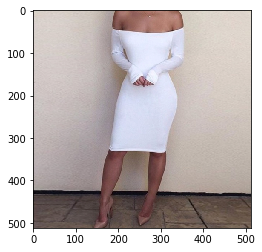

In [20]:
plt.imshow(ds.trafo_tensor2pil(ds[7][0]))

In [9]:
def hist(l, n=10000):
    counter = Counter(l)
    counts = counter.most_common(n)
    if len(counter.values())>n:
        counts.append(("OTHER",sum(counter.values())-sum([i for _, i in counts])))
    plt.bar(range(len(counts)), [i for _, i in counts])
    plt.xticks(range(len(counts)), [i for i, _ in counts], rotation='vertical')
    print(counts)
    plt.show()

## Image dimensions

In [8]:
heights = []
widths = []
labels = []
for i in tqdm(iterable=np.random.permutation(len(ds))[:1000]):
    img, label = ds[i]
    heights.append(img.shape[1])
    widths.append(img.shape[2])
    labels= labels + ds.OH2AttrName(label)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.49it/s]


[(512, 1000)]


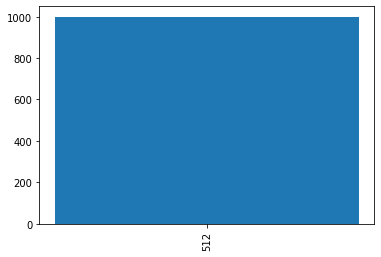

In [10]:
hist(heights)

[(512, 1000)]


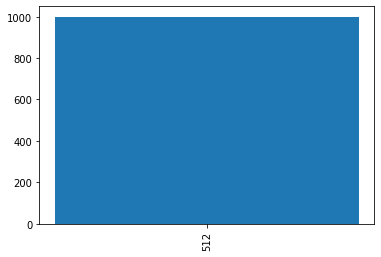

In [11]:
hist(widths)

[('Female', 764), ('Black', 466), ('White', 330), ('Long Sleeved', 328), ('Round Neck', 280), ('Cotton', 274), ('Sleeveless', 261), ('Summer', 261), ('Bodycon', 218), ('Polyester', 218), ('Male', 187), ('Short Sleeves', 184), ('Blue', 152), ('Multi Color', 137), ('Gray', 130), ('V-Necks', 125), ('Collared', 122), ('Dresses', 109), ('Printed', 107), ('Chiffon', 106), ('Lace', 104), ('Spandex', 103), ('Red', 98), ('Spaghetti Straps', 95), ('Pink', 85), ('Clear', 82), ('T-Shirts', 72), ('Denim', 67), ('Casual Dresses', 64), ('Floral', 61), ('U-Necks', 56), ('Beige', 53), ('Green', 53), ('Nylon', 50), ('Hollow-Out', 49), ('Sweetheart Neckline', 48), ('Strapless', 47), ('Yellow', 47), ('Blouses', 46), ('Pleated', 42), ('Neutral', 42), ('Tunic', 40), ('Ripped', 39), ('Asymmetric', 38), ('Maroon', 38), ('Stripes', 35), ('Mesh', 34), ('Peplum', 34), ('Ruched', 33), ('Party Dresses', 33), ('Teal', 32), ('Purple', 32), ('Jackets', 31), ('Swimsuits', 30), ('Off The Shoulder', 30), ('Two-Tone', 29

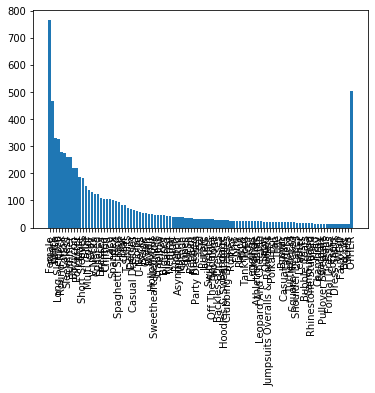

In [18]:
hist(labels, 100)